In [1]:
#importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
df_insurance= pd.read_csv('insurance.csv')
df_insurance.head(2)

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


## Data Exploration

In [4]:
#Checking for the number of observation
df_insurance.shape


(1338, 7)

In [5]:
#Checking for the unique values in the dataset
df_insurance.apply(lambda x:len(x.unique()))

age              47
sex               2
bmi             548
children          6
smoker            2
region            4
medicalCost    1337
dtype: int64

In [6]:
df_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'medicalCost'], dtype='object')

In [7]:
#Checking for missing values
df_insurance.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
medicalCost    0
dtype: int64

In [8]:
#Checking for duplicated values
df_insurance[df_insurance.duplicated()]

,age,sex,bmi,children,smoker,region,medicalCost
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
#dropping the row with the duplicate
df_insurance=df_insurance.drop_duplicates()

#confirming the duplicate is removed
df_insurance.duplicated().sum()

0

In [10]:
#Checking for the summary statistics
df_insurance.describe()

,age,bmi,children,medicalCost
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
#Checking the summary statistics of the dependent variable
#df_insurance['medicalCost'].describe()

In [12]:
#checking attributes of the data
df_insurance.dtypes

age              int64
sex             object
bmi            float64
children         int64
smoker          object
region          object
medicalCost    float64
dtype: object

### Visualizations

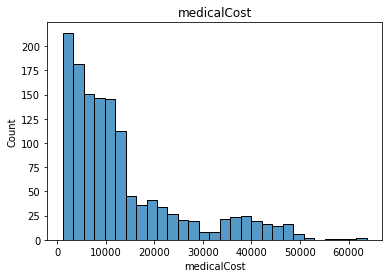

In [13]:
#Visualizing the distribution of the medical cost
plt.figure()
sns.histplot(x='medicalCost', data=df_insurance)
plt.xlabel('medicalCost')
plt.ylabel('Count')
plt.title('medicalCost')
plt.show()

### Visualizing realtionship between Medical Cost and categorical variables

<AxesSubplot:xlabel='smoker', ylabel='medicalCost'>

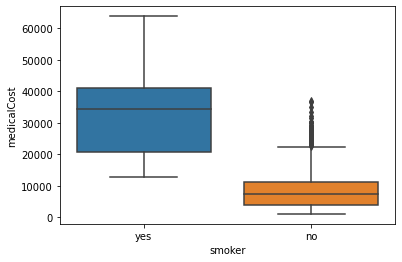

In [16]:
#Checking the impact of smoking and non-smoking on medical cost
sns.boxplot(x="smoker", y="medicalCost", data= df_insurance)

<AxesSubplot:xlabel='sex', ylabel='medicalCost'>

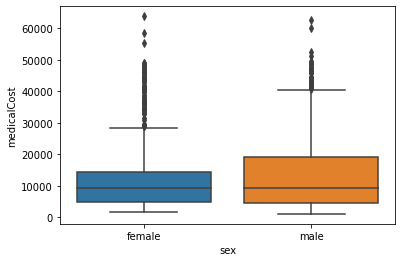

In [17]:
#Checking the relationship between sex and medical cost
sns.boxplot(x="sex", y="medicalCost", data= df_insurance)



<AxesSubplot:xlabel='region', ylabel='medicalCost'>

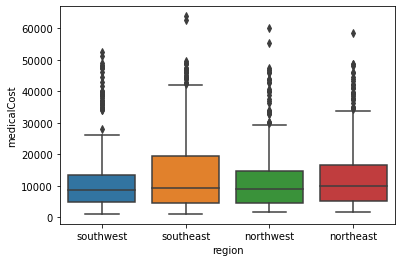

In [18]:
#Checking the relationship between region and medical cost
sns.boxplot(x="region", y="medicalCost", data= df_insurance)


### Visualizing realtionship between Medical Cost and numerical variables

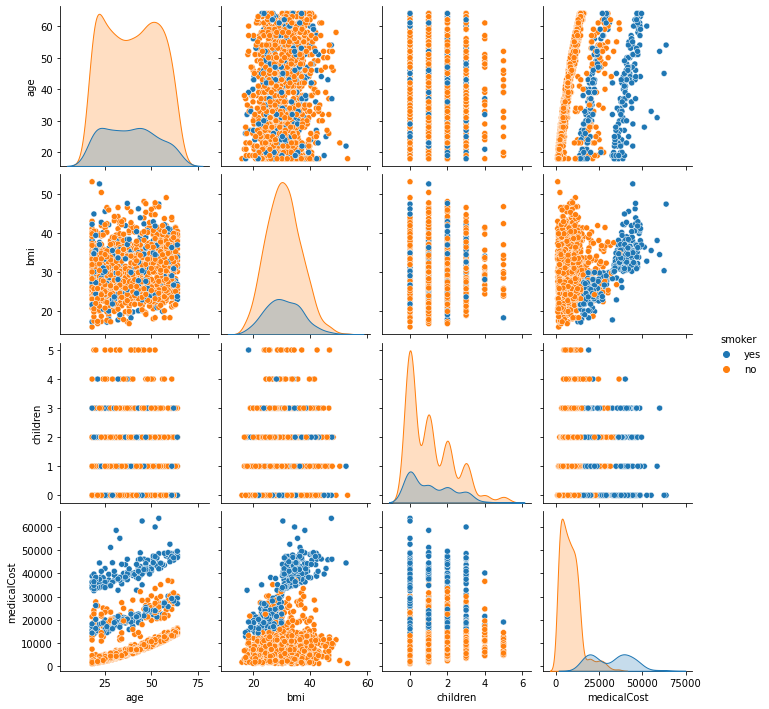

In [19]:
sns.pairplot( df_insurance,hue='smoker')

<Figure size 432x288 with 0 Axes>

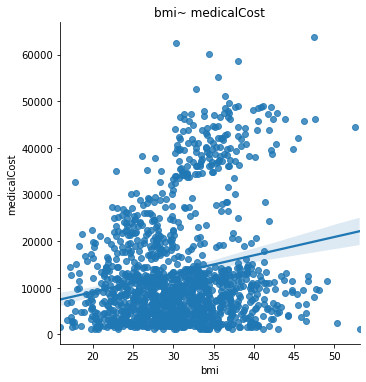

In [20]:
# Visualizing the correlations between Medical cost and bmi

plt.figure()
sns.lmplot('bmi','medicalCost', data= df_insurance)
plt.xlabel('bmi')
plt.ylabel('medicalCost')
plt.title('bmi~ medicalCost')
plt.show()



<Figure size 432x288 with 0 Axes>

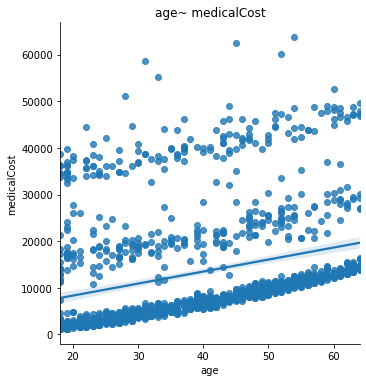

In [21]:
# Visualizing the correlations between Medical cost and Age
import matplotlib.pyplot as plt
plt.figure()
sns.lmplot('age','medicalCost', data=df_insurance)
plt.xlabel('age')
plt.ylabel('medicalCost')
plt.title('age~ medicalCost')
plt.show()


<Figure size 432x288 with 0 Axes>

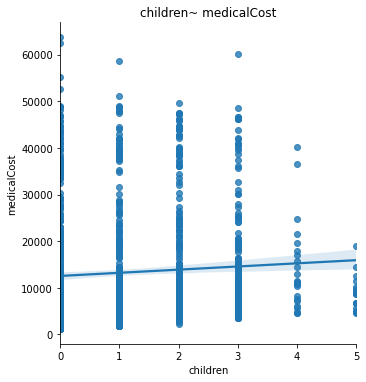

In [22]:
# Visualizing the correlations between Medical cost and Children
import matplotlib.pyplot as plt
plt.figure()
sns.lmplot('children','medicalCost', data= df_insurance)
plt.xlabel('children')
plt.ylabel('medicalCost')
plt.title('children~ medicalCost')
plt.show()



In [23]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1337 non-null   int64  
 1   sex          1337 non-null   object 
 2   bmi          1337 non-null   float64
 3   children     1337 non-null   int64  
 4   smoker       1337 non-null   object 
 5   region       1337 non-null   object 
 6   medicalCost  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 115.9+ KB


## Creating Dummy variables

In [25]:
#Label encoding smoker and sex variables
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cat = ['sex','smoker']

#Encode Categorical Columns
le = LabelEncoder()
df_insurance[cat] = df_insurance[cat].apply(le.fit_transform)

In [26]:
# One hot encoder for the region variable
#droping first to avoid dummy variable trap

df_insurance=pd.get_dummies(df_insurance, prefix=['region'],drop_first=True )

In [27]:
#Checking the new dataframe
df_insurance.head(2)

,age,sex,bmi,children,smoker,medicalCost,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,16884.9240,0,0,1
1,18,1,33.77,1,0,1725.5523,0,1,0


In [28]:
#Checking the size of the dataframe
df_insurance.shape

(1337, 9)

In [31]:
#Checking for the correlations between the variables
df_insurance.corr()

,age,sex,bmi,children,smoker,medicalCost,region_northwest,region_southeast,region_southwest
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.298308,0.001495,-0.012311,0.009415
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.058044,-0.012482,0.017578,-0.003767
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.198401,-0.136138,0.270057,-0.006211
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.067389,0.026044,-0.023492,0.021538
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,0.787234,-0.036321,0.068282,-0.037168
medicalCost,0.298308,0.058044,0.198401,0.067389,0.787234,1.000000,-0.038695,0.073578,-0.043637
region_northwest,0.001495,-0.012482,-0.136138,0.026044,-0.036321,-0.038695,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.017578,0.270057,-0.023492,0.068282,0.073578,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.003767,-0.006211,0.021538,-0.037168,-0.043637,-0.320493,-0.346614,1.000000


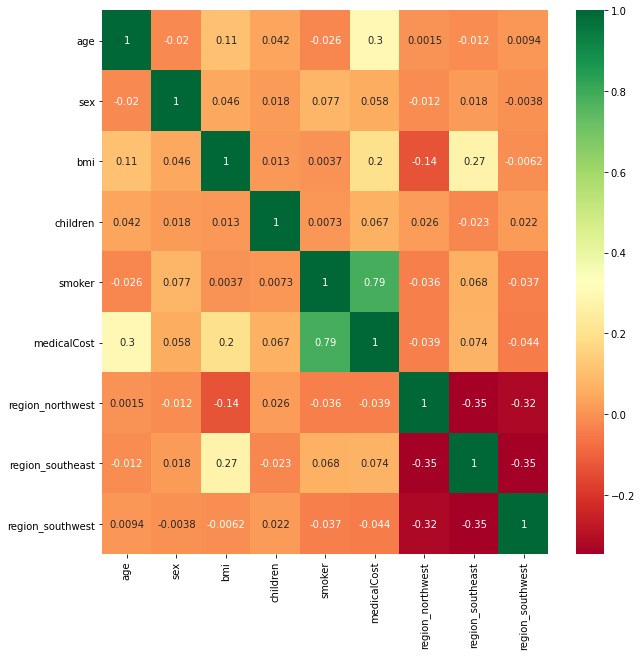

In [32]:
#plotting the heatmap to visualize the correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_insurance.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_insurance[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Building a simple linear regression for the predictors 

In [34]:
#Determining the features and target label
X = df_insurance[['age', 'bmi', 'children','smoker', 'sex', 'region_northwest','region_southeast', 'region_southwest']]
y = df_insurance[['medicalCost']]

In [35]:
#Splitting thedata into 2 groups: the training and the testing group
#setting the testing group at 0.2
#Setting the random at 0
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [37]:
# Checking for the linearity between Medical cost vs smokers
X = df_insurance[['smoker']]
y = df_insurance[['medicalCost']]
lin_reg= LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)
# show the reg (R^2)


0.619737949026792

In [38]:
# Checking for linearity between  Medical cost vs Age
X =df_insurance[['age']]
y = df_insurance[['medicalCost']]
lin_reg= LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)
# show the reg (R^2)

0.0889877896507838

In [40]:
# Checking for linearity between  Medical cost vs BMI
X = df_insurance[['bmi']]
y = df_insurance[['medicalCost']]
lin_reg= LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)
# show the reg (R^2)

0.03936288983126668

In [41]:
# Building the prediction model between Medical cost vs Age and BMI
X = df_insurance[['age','bmi']]
y = df_insurance[['medicalCost']]
lin_reg= LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)
# show the reg (R^2)

0.11680427927637338

In [42]:
# Building the prediction model between Medical cost vs BMI and smoker
X = df_insurance[['bmi', 'smoker']]
y = df_insurance[['medicalCost']]
lin_reg= LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)
# show the reg (R^2)

0.6579398445674455

In [43]:
# Building the prediction model between Medical cost vs Age and smokers
X = df_insurance[['age','smoker']]
y = df_insurance[['medicalCost']]
lin_reg= LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)
# show the reg (R^2)

0.7212155984066755

In [44]:
# Building the prediction model for Medical cost vs the best three precictors (Age,bmi and smoker_yes)
X = df_insurance[['age','bmi','smoker']]
y = df_insurance[['medicalCost']]
lin_reg= LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)
# show the reg (R^2)


0.7473139508211375

In [45]:
# Building the prediction model of the all the predictors
df_insurance[['age', 'bmi', 'children','smoker', 'sex', 'region_northwest',
              'region_southeast', 'region_southwest']]
y = df_insurance[['medicalCost']]
lin_reg= LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)



0.7473139508211375

## Predicting medical cost using the model

In [46]:
#estimating what medical cost with the top three predictors
#age=30, bmi=40 and is a smoker

X = df_insurance[['age','bmi','smoker']]
y = df_insurance[['medicalCost']]

lin_reg= LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.score(X, y))
print(lin_reg.coef_)

pred_cost = lin_reg.predict([[30,40,1]])
pred_cost


0.7473139508211375
[[  259.43121725   322.64258245 23822.18360115]]


array([[32839.12920808]])

In [47]:
#estimating what medical cost would be if an individual's
#age=30 and is a smoker

X = df_insurance[['age','smoker']]
y = df_insurance[['medicalCost']]

lin_reg= LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.score(X, y))
print(lin_reg.coef_)

pred_cost = lin_reg.predict([[30,1]])
pred_cost


0.7212155984066755
[[  274.77887642 23854.10191344]]


array([[29710.60001147]])

In [48]:
#estimating what medical cost would be if an individual's
#age=30 with bmi=40


X = df_insurance[['age','bmi']]
y = df_insurance[['medicalCost']]

lin_reg= LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.score(X, y))
print(lin_reg.coef_)

pred_cost = lin_reg.predict([[30,40]])
pred_cost

0.11680427927637338
[[241.40950312 333.08638611]]


array([[14162.68657742]])

In [49]:
#estimating what medical cost would be if an individual is aged 30

X = df_insurance[['smoker']]
y = df_insurance[['medicalCost']]

lin_reg= LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.score(X, y))
print(lin_reg.coef_)

pred_cost = lin_reg.predict([[1]])
pred_cost


0.619737949026792
[[23609.57152502]]


array([[32050.23183153]])

In [50]:
#estimating what medical cost would be if an individual bmi =40

X = df_insurance[['bmi']]
y = df_insurance[['medicalCost']]

lin_reg= LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.score(X, y))
print(lin_reg.coef_)

pred_cost = lin_reg.predict([[1]])
pred_cost


0.03936288983126668
[[393.85589121]]


array([[1595.99625828]])

### Statistical significance of the model

In [51]:
#Creating a fitted model with all features using the Ordinary Least Squares (OLS) method
import statsmodels.formula.api as smf
lm3 = smf.ols(formula='medicalCost ~ children + sex+ bmi+ age+ smoker +region_northwest + region_southeast + region_southwest',
              data=df_insurance).fit() 

#Print coefficients
lm3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            medicalCost   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        05:51:42   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.194e+04    988.227    -12.079      0.000   -1.39e+04   -9997.900
children           474.8205    137.897      3.443      0.001     204.301     745.340
sex               -129.4815    333.195     -0.389      0.698    -783.128     524.165
bmi                339.2504     28.611     11.857      0.000     283.122     395.379
age                256.7646     11.912     21.555      0.000     233.396     280.133
smoker            2.385e+04    413.348     57.693      0.000     2.3e+04    2.47e+04
region_northwest  -349.2265    476.824     -0.732      0.464   -1284.637     586.183
region_southeast -1035.2656    478.867     -2.162      0.031   -1974.684     -95.847
region_southwest  -960.0814    478.106     -2.008      0.045   -1898.007     -22.156
==============================================================================
Omnibus:                      299.816   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.552
Skew:                           1.211   Prob(JB):                    2.53e-156
Kurtosis:                       5.646   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
lm3.params
print(lm3.pvalues)

Intercept           6.039793e-32
children            5.925434e-04
sex                 6.976303e-01
bmi                 6.721670e-31
age                 1.324461e-88
smoker              0.000000e+00
region_northwest    4.640527e-01
region_southeast    3.080353e-02
region_southwest    4.483556e-02
dtype: float64


In [53]:
#Creating a fitted model with the top three features using the OLS  method
import statsmodels.formula.api as smf


lm3= smf.ols(formula='medicalCost ~ smoker + bmi+ age',
             data=df_insurance).fit()

#Print coefficients
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            medicalCost   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1314.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        05:51:42   Log-Likelihood:                -13547.
No. Observations:                1337   AIC:                         2.710e+04
Df Residuals:                    1333   BIC:                         2.712e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.167e+04    938.136    -12.441      0.000   -1.35e+04   -9831.310
smoker      2.382e+04    413.058     57.673      0.000     2.3e+04    2.46e+04
bmi          322.6426     27.497     11.734      0.000     268.700     376.585
age          259.4312     11.948     21.714      0.000     235.992     282.870
==============================================================================
Omnibus:                      299.150   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              707.824
Skew:                           1.212   Prob(JB):                    1.99e-154
Kurtosis:                       5.613   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
lm3.params
print(lm3.pvalues)


Intercept    1.068685e-33
smoker       0.000000e+00
bmi          2.509887e-30
age          9.355747e-90
dtype: float64


In [56]:
#Creating a fitted model with the features using the Ordinary Least Squares (OLS) method
import statsmodels.formula.api as smf
lm3 = smf.ols(formula='medicalCost ~ bmi', data=df_insurance).fit()
lm3.summary()
print(lm3.pvalues)



Intercept    4.703789e-01
bmi          2.468040e-13
dtype: float64


## Polynomial Regression

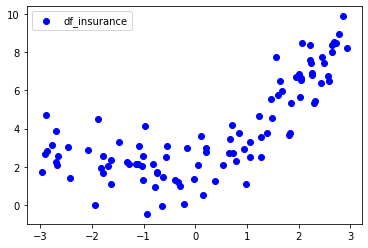

In [59]:
#Fitting the nonlinear data
import numpy as np
import matplotlib.pyplot as plt
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.figure()
plt.scatter(X, y, marker = 'o', color = 'b', label='df_insurance')
plt.legend()
plt.show()

In [60]:
#Working out the linear score
lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.score(X, y)


0.5429885062946016

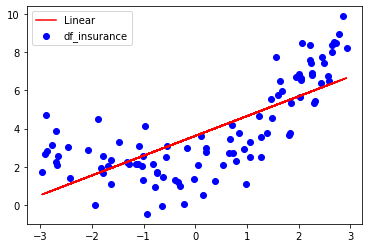

In [61]:
#Testing with Linear Regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
Y_pred = lin_reg.predict(X)
plt.figure()
plt.scatter(X, y, marker = 'o', color = 'b', label='df_insurance')
plt.plot(X, Y_pred, color='red', label='Linear')
plt.legend()
plt.show()

In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])



[2.3001998]
[2.3001998  5.29091913]


In [63]:
#working out the score on the polynomial axis
import operator

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

Y_poly_pred = lin_reg.predict(X_poly)

lin_reg.score(X_poly, y)


0.8101787313522467

[2.14783188] [[0.97614478 0.47319871]]


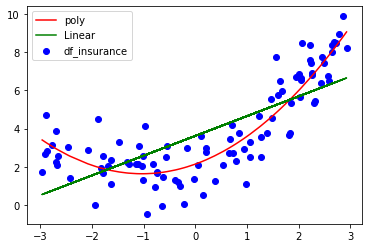

In [64]:
#Fitting a LinearRegression model to the extended training data
from sklearn.linear_model import LinearRegression
import operator
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)
Y_poly_pred = lin_reg.predict(X_poly)

import matplotlib.pyplot as plt
import operator
plt.figure()
plt.scatter(X, y, marker = 'o', color = 'b', label='df_insurance')
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,Y_poly_pred), key=sort_axis)
x, Y_poly_pred = zip(*sorted_zip)
plt.plot(x, Y_poly_pred, color='red', label='poly')

#plt.scatter(X, Y_poly_pred, color='red', label='poly')
plt.plot(X, Y_pred, color='green', label='Linear')
plt.legend()
plt.show()

In [65]:
# Ploynomial at a second degree of freedom  

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

import operator

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
Y_poly_pred= lin_reg.predict(X_poly)
lin_reg.score(X_poly,y)



0.8101787313522467

In [66]:
#changing the degree of polynomial to 5
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)

import operator

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
Y_poly_pred= lin_reg.predict(X_poly)
lin_reg.score(X_poly,y)

0.8195888031593674

In [67]:
#changing the degree of polynomial to 10
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

import operator

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
Y_poly_pred= lin_reg.predict(X_poly)
lin_reg.score(X_poly,y)

0.8307207879380716

In [68]:
#Changing the degree of the polynomial to 3
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3,include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])
# The R² is showing a reduction

[2.3001998]
[ 2.3001998   5.29091913 12.17017114]


In [69]:
#Changing the degree of the polynomial to 5
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=5,include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[2.3001998]
[ 2.3001998   5.29091913 12.17017114 27.99382527 64.39139136]
